## Importing Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,precision_recall_fscore_support,ConfusionMatrixDisplay,confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

## Reading Dataset

In [67]:
dataframe = pd.read_csv("risk_factors_cervical_cancer.csv")

In [68]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [69]:
dataframe.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## Converting "?" to numpy NaN

In [70]:
dataframe[dataframe == "?"] = np.nan

In [71]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

## Droping Columns which contains a lot of null values

In [29]:
dataframe.drop(columns=["STDs: Time since first diagnosis","STDs: Time since last diagnosis"],inplace=True)

In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

## Seperating different data types for next steps

In [31]:
boolean_columns = dataframe.iloc[:,[4,7,9,11,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33]]
int_columns = dataframe.iloc[:,[0,1,2,3,5,6,8,10,12,25]]

In [32]:
int_columns

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
854,32,2.0,19.0,1.0,0.0,0.0,8.0,0.0,0.0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.08,0.0,0.0,0
856,33,2.0,24.0,2.0,0.0,0.0,0.08,0.0,0.0,0


## Filling null boolean values with most frequent value

In [33]:
imp_for_boolean = SimpleImputer(strategy="most_frequent")

In [34]:
array_boolean = imp_for_boolean.fit_transform(boolean_columns)

In [35]:
bolean_df = pd.DataFrame(array_boolean,columns=boolean_columns.columns)
change_type = {"0.0":0,"1.0":1}
bolean_df.replace(change_type,inplace=True)

## Filling null int values with mean of the column

In [36]:
imp_for_int = SimpleImputer(strategy="mean")
int_array = (imp_for_int.fit_transform(int_columns))

In [37]:
int_df = pd.DataFrame(int_array,columns=int_columns.columns)
int_df = int_df.astype(np.int64)

In [38]:
df = pd.concat([int_df,bolean_df],axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 858 non-null    int64
 1   Number of sexual partners           858 non-null    int64
 2   First sexual intercourse            858 non-null    int64
 3   Num of pregnancies                  858 non-null    int64
 4   Smokes (years)                      858 non-null    int64
 5   Smokes (packs/year)                 858 non-null    int64
 6   Hormonal Contraceptives (years)     858 non-null    int64
 7   IUD (years)                         858 non-null    int64
 8   STDs (number)                       858 non-null    int64
 9   STDs: Number of diagnosis           858 non-null    int64
 10  Smokes                              858 non-null    int64
 11  Hormonal Contraceptives             858 non-null    int64
 12  IUD     

# Split Data Features and Labels

In [40]:
X = df.iloc[:,:30]
Hinselmann = df.iloc[:,30]
Schiller = df.iloc[:,31]
Citology = df.iloc[:,32]
Biopsy = df.iloc[:,33]

In [41]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,37,37,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,46,3,21,4,0,0,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split Data as Training and Testing

In [49]:
X_trainH,X_testH,y_trainH,y_testH = train_test_split(X,Hinselmann,test_size=0.33,random_state=42)
X_trainS,X_testS,y_trainS,y_testS = train_test_split(X,Schiller,test_size=0.33,random_state=42)
X_trainC,X_testC,y_trainC,y_testC = train_test_split(X,Citology,test_size=0.33,random_state=42)
X_trainB,X_testB,y_trainB,y_testB = train_test_split(X,Biopsy,test_size=0.33,random_state=42)

In [73]:
model = ComplementNB()

rfe = RFE(estimator=model,n_features_to_select=25)

pipeline = Pipeline(steps=[("s",rfe),("m",model)])

pipeline.fit(X_trainH,y_trainH)

ypred = pipeline.predict(X_testH)

C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation

In [74]:
print(classification_report(y_testH,ypred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       272
           1       0.14      0.25      0.18        12

    accuracy                           0.90       284
   macro avg       0.55      0.59      0.56       284
weighted avg       0.93      0.90      0.91       284



In [64]:
cm = confusion_matrix(y_testH,ypred)

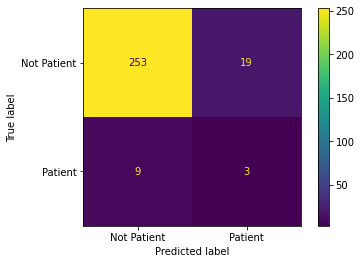

In [72]:
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Patient","Patient"]).plot()

In [87]:
model2 = ComplementNB()

rfe2 = RFE(estimator=model2,n_features_to_select=15)

pipeline2 = Pipeline(steps=[("s",rfe2),("m",model2)])

pipeline2.fit(X_trainS,y_trainS)

ypred2 = pipeline2.predict(X_testS)

C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Users\Baran\anaconda3\lib\site-packages\sklearn\utils\deprecation

In [88]:
print(classification_report(y_testS,ypred2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       260
           1       0.36      0.21      0.26        24

    accuracy                           0.90       284
   macro avg       0.64      0.59      0.61       284
weighted avg       0.88      0.90      0.89       284



In [89]:
print(confusion_matrix(y_testS,ypred2))

[[251   9]
 [ 19   5]]


<h1 style="color:green;">Naive Bayes</h1>

In [55]:
cnb = ComplementNB()

## Naive Bayes for classification of Hinselmann target variable

In [56]:
cnb.fit(X_trainH,y_trainH)

ComplementNB()

In [57]:
y_predH = cnb.predict(X_testH)

In [58]:
cmH = confusion_matrix(y_testH,y_predH)

In [59]:
print(cmH)

[[252  20]
 [ 10   2]]


In [60]:
clf_report = classification_report(y_testH,y_predH,target_names=["Negative","Positive"],output_dict=True)

In [61]:
print(classification_report(y_testH,y_predH,target_names=["Negative","Positive"]))

              precision    recall  f1-score   support

    Negative       0.96      0.93      0.94       272
    Positive       0.09      0.17      0.12        12

    accuracy                           0.89       284
   macro avg       0.53      0.55      0.53       284
weighted avg       0.93      0.89      0.91       284



## Naive Bayes for classification of Schiller target variable

In [35]:
y_predS = cnb.fit(X_trainS,y_trainS).predict(X_testS)

In [36]:
clf_report_2 = classification_report(y_testS,y_predS,target_names=["Negative","Positive"])

In [37]:
print(clf_report_2)

              precision    recall  f1-score   support

    Negative       0.96      0.85      0.90       237
    Positive       0.26      0.57      0.35        21

    accuracy                           0.83       258
   macro avg       0.61      0.71      0.63       258
weighted avg       0.90      0.83      0.86       258



In [38]:
metrics.accuracy_score(y_testS,y_predS)

0.8294573643410853

## Naive Bayes for classification of Citology target variable

In [39]:
y_predC = cnb.fit(X_trainC,y_trainC).predict(X_testC)

In [40]:
clf_report_3 = classification_report(y_testC,y_predC,target_names=["Negative","Positive"])

In [41]:
print(clf_report_3)

              precision    recall  f1-score   support

    Negative       0.98      0.77      0.86       250
    Positive       0.06      0.50      0.11         8

    accuracy                           0.76       258
   macro avg       0.52      0.63      0.49       258
weighted avg       0.95      0.76      0.84       258



## Naive Bayes for classification of Biopsy target variable

In [42]:
y_predB = cnb.fit(X_trainB,y_trainB).predict(X_testB)

In [43]:
clf_report_4 = classification_report(y_testB,y_predB,target_names=["Negative","Positive"])

In [44]:
print(clf_report_4)

              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93       243
    Positive       0.17      0.33      0.22        15

    accuracy                           0.86       258
   macro avg       0.56      0.62      0.57       258
weighted avg       0.91      0.86      0.88       258



In [45]:
metrics.accuracy_score(y_testB,y_predB)

0.8643410852713178

<h1 style="color:green;">K Nearest Neighbors</h1>

## K Nearest Neighbors for classification of Hinselmann target variable

In [46]:
clfH = neighbors.KNeighborsClassifier()

In [47]:
clfH.fit(X_trainH,y_trainH)

KNeighborsClassifier()

In [48]:
y_predH = clfH.predict(X_testH)

In [49]:
cmH = confusion_matrix(y_testH,y_predH)

In [50]:
cmH

array([[248,   0],
       [ 10,   0]], dtype=int64)

In [51]:
crpH = classification_report(y_testH,y_predH
                           ,zero_division=1)

In [52]:
clfH.score(X_testH,y_testH)

0.9612403100775194

In [53]:
print(crpH)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       248
           1       1.00      0.00      0.00        10

    accuracy                           0.96       258
   macro avg       0.98      0.50      0.49       258
weighted avg       0.96      0.96      0.94       258



## K Nearest Neighbors for classification of Schiller target variable

In [54]:
clfS = neighbors.KNeighborsClassifier()

In [55]:
clfS.fit(X_trainS,y_trainS)

KNeighborsClassifier()

In [56]:
clfS.score(X_testS,y_testS)

0.9108527131782945

In [57]:
y_predS = clfS.predict(X_testS)

In [58]:
confusion_matrix(y_testS,y_predS)

array([[234,   3],
       [ 20,   1]], dtype=int64)

In [59]:
print(classification_report(y_testS,y_predS))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       237
           1       0.25      0.05      0.08        21

    accuracy                           0.91       258
   macro avg       0.59      0.52      0.52       258
weighted avg       0.87      0.91      0.88       258



## K Nearest Neighbors for classification of Citology target variable

In [60]:
clfC = neighbors.KNeighborsClassifier()

In [61]:
clfC.fit(X_trainC,y_trainC)

KNeighborsClassifier()

In [62]:
y_predC = clfC.predict(X_testC)

In [63]:
confusion_matrix(y_testC,y_predC)

array([[249,   1],
       [  8,   0]], dtype=int64)

In [64]:
print(classification_report(y_testC,y_predC,zero_division=1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       0.00      0.00      0.00         8

    accuracy                           0.97       258
   macro avg       0.48      0.50      0.49       258
weighted avg       0.94      0.97      0.95       258



## K Nearest Neighbors for classification of Biopsy target variable

In [65]:
clfB = kNN()

In [66]:
clfB.fit(X_trainB,y_trainB)

KNeighborsClassifier()

In [67]:
y_predB = clfB.predict(X_testB)

In [68]:
confusion_matrix(y_testB,y_predB)

array([[241,   2],
       [ 15,   0]], dtype=int64)

In [69]:
print(classification_report(y_testB,y_predB,zero_division=1))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       243
           1       0.00      0.00      0.00        15

    accuracy                           0.93       258
   macro avg       0.47      0.50      0.48       258
weighted avg       0.89      0.93      0.91       258



<h1 style="color:green;">Decision Tree</h1>

## Decision Tree for classification of Hinselmann target variable

In [70]:
dclfH = DecisionTreeClassifier(random_state=0)

In [71]:
dclfH.fit(X_trainH,y_trainH)

DecisionTreeClassifier(random_state=0)

In [72]:
y_predH = dclfH.predict(X_testH)

In [73]:
crt = classification_report(y_testH,y_predH)

In [74]:
print(crt)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       248
           1       0.10      0.10      0.10        10

    accuracy                           0.93       258
   macro avg       0.53      0.53      0.53       258
weighted avg       0.93      0.93      0.93       258



## Decision Tree for classification of Schiller target variable

In [75]:
dclfS = DecisionTreeClassifier(random_state=0)

In [76]:
dclfS.fit(X_trainS,y_trainS)

DecisionTreeClassifier(random_state=0)

In [77]:
y_predS = dclfS.predict(X_testS)

In [78]:
crt2 = classification_report(y_testS,y_predS)

In [79]:
print(crt2)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       237
           1       0.17      0.19      0.18        21

    accuracy                           0.86       258
   macro avg       0.55      0.55      0.55       258
weighted avg       0.87      0.86      0.86       258



In [80]:
cmS = confusion_matrix(y_testS,y_predS)

In [81]:
cmdS = ConfusionMatrixDisplay(confusion_matrix = cmS,display_labels=[0,1])

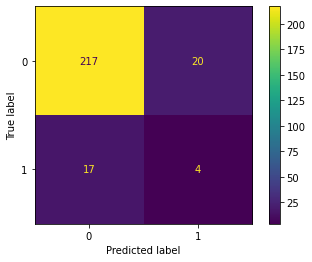

In [82]:
cmdS.plot()

## Decision Tree for classification of Citology target variable

In [83]:
dclfC = DecisionTreeClassifier(random_state=0)

In [84]:
dclfC.fit(X_trainC,y_trainC)

DecisionTreeClassifier(random_state=0)

In [85]:
y_predC = dclfC.predict(X_testC)

In [86]:
clrC = classification_report(y_testC,y_predC)
print(clrC)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       250
           1       0.09      0.25      0.13         8

    accuracy                           0.90       258
   macro avg       0.53      0.58      0.54       258
weighted avg       0.95      0.90      0.92       258



In [87]:
cmC = confusion_matrix(y_testC,y_predC)
print(cmC)

[[230  20]
 [  6   2]]


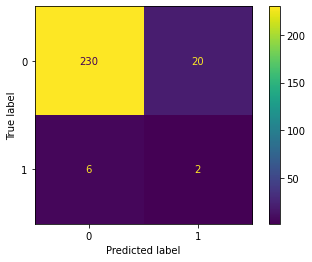

In [88]:
cmdC = ConfusionMatrixDisplay(confusion_matrix=cmC,display_labels=[0,1])
cmdC.plot()

## Decision Tree for classification of Biopsy target variable

In [89]:
dclfB = DecisionTreeClassifier(random_state=0)

In [90]:
dclfB.fit(X_trainB,y_trainB)

DecisionTreeClassifier(random_state=0)

In [91]:
y_predB = dclfB.predict(X_testB)

In [92]:
cmB = confusion_matrix(y_testB,y_predB)

In [93]:
clrB = classification_report(y_testB,y_predB)
print(clrB)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       243
           1       0.24      0.27      0.25        15

    accuracy                           0.91       258
   macro avg       0.59      0.61      0.60       258
weighted avg       0.91      0.91      0.91       258



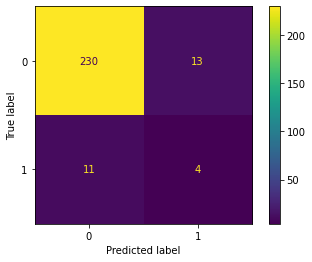

In [94]:
cmdB = ConfusionMatrixDisplay(confusion_matrix=cmB,display_labels=[0,1])
cmdB.plot()

<h1 style="color:green">Random Forest</h1>

## Random Forest for classification of Hinselmann target variable

In [95]:
rfcH = RandomForestClassifier(random_state=0)

In [96]:
rfcH.fit(X_trainH,y_trainH)

RandomForestClassifier(random_state=0)

In [97]:
y_predH = rfcH.predict(X_testH)

In [98]:
cmH = confusion_matrix(y_testH,y_predH)
print(cmH)

[[248   0]
 [ 10   0]]


In [99]:
clrH = classification_report(y_testH,y_predH,zero_division=1)

In [100]:
print(clrH)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       248
           1       1.00      0.00      0.00        10

    accuracy                           0.96       258
   macro avg       0.98      0.50      0.49       258
weighted avg       0.96      0.96      0.94       258



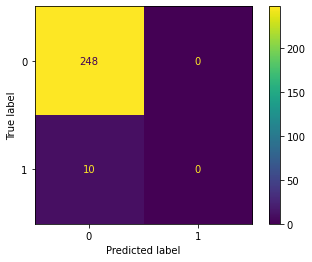

In [101]:
cmdH = ConfusionMatrixDisplay(confusion_matrix=cmH,display_labels=[0,1])
cmdH.plot()

## Random Forest for classification of Schiller target variable

In [102]:
rfcS = RandomForestClassifier(random_state=0)

In [103]:
rfcS.fit(X_trainS,y_trainS)

RandomForestClassifier(random_state=0)

In [104]:
y_predS = rfcS.predict(X_testS)

In [105]:
cmS = confusion_matrix(y_testS,y_predS)

In [106]:
clrS = classification_report(y_testS,y_predS)
print(clrS)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       237
           1       0.67      0.10      0.17        21

    accuracy                           0.92       258
   macro avg       0.80      0.55      0.56       258
weighted avg       0.90      0.92      0.89       258



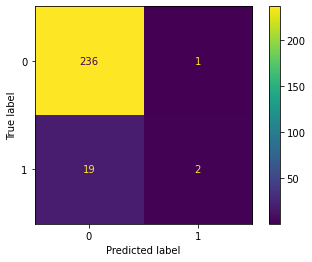

In [107]:
cmdS = ConfusionMatrixDisplay(confusion_matrix=cmS,display_labels=[0,1])
cmdS.plot()

## Random Forest for classification of Citology target variable

In [108]:
rfcC = RandomForestClassifier(random_state=0)

In [109]:
rfcC.fit(X_trainC,y_trainC)

RandomForestClassifier(random_state=0)

In [110]:
y_predC = rfcC.predict(X_testC)

In [111]:
cmC = confusion_matrix(y_testC,y_predC)

In [112]:
clrC = classification_report(y_testC,y_predC)
print(clrC)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       250
           1       0.00      0.00      0.00         8

    accuracy                           0.96       258
   macro avg       0.48      0.50      0.49       258
weighted avg       0.94      0.96      0.95       258



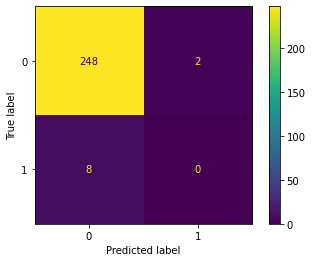

In [113]:
cmdC = ConfusionMatrixDisplay(confusion_matrix=cmC,display_labels=[0,1])
cmdC.plot()

## Random Forest for classification of Biopsy target variable

In [114]:
rfcB = RandomForestClassifier(random_state=0)

In [115]:
rfcB.fit(X_trainB,y_trainB)

RandomForestClassifier(random_state=0)

In [116]:
y_predB = rfcB.predict(X_testB)

In [117]:
cmB = confusion_matrix(y_testB,y_predB)

In [118]:
print(cmB)

[[242   1]
 [ 14   1]]


In [119]:
clrB = classification_report(y_testB,y_predB)

In [120]:
print(clrB)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       243
           1       0.50      0.07      0.12        15

    accuracy                           0.94       258
   macro avg       0.72      0.53      0.54       258
weighted avg       0.92      0.94      0.92       258



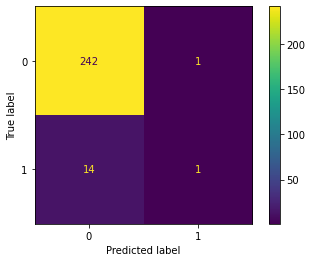

In [121]:
cmdB = ConfusionMatrixDisplay(confusion_matrix=cmB,display_labels=[0,1])
cmdB.plot()

<h1 style="color:green">Support Vector Machines</h1>

## Support Vector Machines for classification of Hinselmann target variable

In [122]:
svmH = svm.SVC()

In [123]:
svmH.fit(X_trainH,y_trainH)

SVC()

In [124]:
y_predH = svmH.predict(X_testH)

In [125]:
cmH = confusion_matrix(y_testH,y_predH)

In [126]:
clrH = classification_report(y_testH,y_predH,zero_division=1)
print(clrH)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       248
           1       1.00      0.00      0.00        10

    accuracy                           0.96       258
   macro avg       0.98      0.50      0.49       258
weighted avg       0.96      0.96      0.94       258



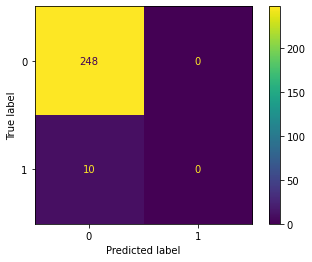

In [127]:
cmdH = ConfusionMatrixDisplay(confusion_matrix=cmH,display_labels=[0,1])
cmdH.plot()

## Support Vector Machines for classification of Schiller target variable

In [128]:
svmS = svm.SVC()

In [129]:
svmS.fit(X_trainS,y_trainS)

SVC()

In [130]:
y_predS = svmS.predict(X_testS)

In [131]:
cmS = confusion_matrix(y_testS,y_predS)

In [132]:
clrS = classification_report(y_testS,y_predS,zero_division=1)
print(clrS)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       237
           1       1.00      0.00      0.00        21

    accuracy                           0.92       258
   macro avg       0.96      0.50      0.48       258
weighted avg       0.93      0.92      0.88       258



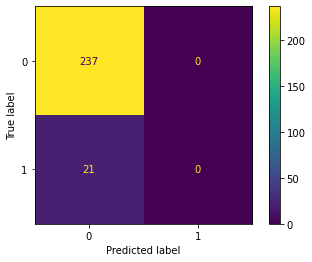

In [133]:
cmdS = ConfusionMatrixDisplay(confusion_matrix=cmS,display_labels=[0,1])
cmdS.plot()

## Support Vector Machines for classification of Citology target variable

In [134]:
svmC = svm.SVC()

In [135]:
svmC.fit(X_trainC,y_trainC)

SVC()

In [136]:
y_predC = svmC.predict(X_testC)

In [137]:
cmC = confusion_matrix(y_testC,y_predC)

In [138]:
clrC = classification_report(y_testC,y_predC,zero_division=1)
print(clrC)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       1.00      0.00      0.00         8

    accuracy                           0.97       258
   macro avg       0.98      0.50      0.49       258
weighted avg       0.97      0.97      0.95       258



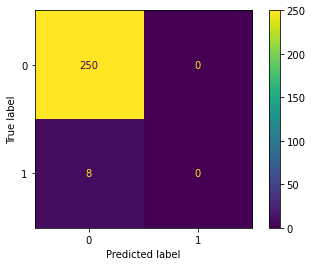

In [139]:
cmdC = ConfusionMatrixDisplay(confusion_matrix=cmC,display_labels=[0,1])
cmdC.plot()

## Support Vector Machines for classification of __Biopsy__ target variable

In [140]:
svmB = svm.SVC()

In [141]:
svmB.fit(X_trainB,y_trainB)

SVC()

In [142]:
y_predB = svmB.predict(X_testB)

In [143]:
cmB = confusion_matrix(y_testB,y_predB)

In [144]:
print(cmB)

[[243   0]
 [ 15   0]]


In [145]:
clrB = classification_report(y_testB,y_predB,zero_division=1)

In [146]:
print(clrB)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       243
           1       1.00      0.00      0.00        15

    accuracy                           0.94       258
   macro avg       0.97      0.50      0.49       258
weighted avg       0.95      0.94      0.91       258



In [147]:
cmdB = ConfusionMatrixDisplay(confusion_matrix=cmB,display_labels=[0,1])

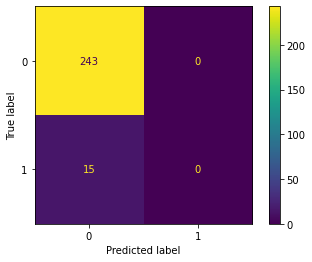

In [148]:
cmdB.plot()

<h1 style="color:red"> Applying SMOTE to the Dataset </h1>

In [149]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [150]:
under = RandomUnderSampler(sampling_strategy=0.5)
over = SMOTE(sampling_strategy=0.5)
model = ComplementNB()
steps = [('over',over),('under',under),('model',model)]
pipeline = Pipeline(steps=steps)

In [151]:
pipeline.fit(X_trainH,y_trainH)

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.5)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('model', ComplementNB())])

In [152]:
predict = pipeline.predict(X_testH)

In [153]:
print(predict)

[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1]


In [154]:
confusion_m = confusion_matrix(y_testH,predict)

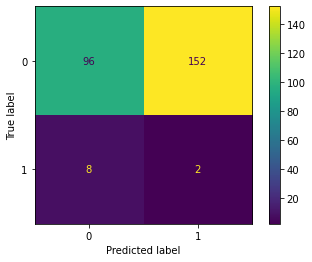

In [155]:
ConfusionMatrixDisplay(confusion_matrix=confusion_m,display_labels=[0,1]).plot()

In [156]:
print(classification_report(y_testH,predict))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55       248
           1       0.01      0.20      0.02        10

    accuracy                           0.38       258
   macro avg       0.47      0.29      0.28       258
weighted avg       0.89      0.38      0.53       258



## Naive Bayes after applying SMOTE for classification of Hinselmann target variable

In [157]:
cnbs = ComplementNB()

In [158]:
smote = SMOTE()

In [159]:
X_trainHres,y_trainHres = smote.fit_resample(X_trainH,y_trainH)

In [160]:
cnbs.fit(X_trainHres,y_trainHres)

ComplementNB()

In [161]:
y_predHres = cnbs.predict(X_testH)

In [162]:
cmHres = confusion_matrix(y_testH,y_predHres)

In [163]:
cmdHres = ConfusionMatrixDisplay(confusion_matrix=cmHres,display_labels=[0,1])

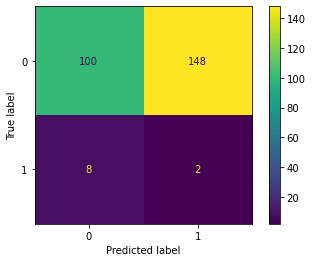

In [164]:
cmdHres.plot()

In [165]:
cla_rep = classification_report(y_predHres,y_testH)

In [166]:
print(cla_rep)

              precision    recall  f1-score   support

           0       0.40      0.93      0.56       108
           1       0.20      0.01      0.03       150

    accuracy                           0.40       258
   macro avg       0.30      0.47      0.29       258
weighted avg       0.29      0.40      0.25       258



## Naive Bayes after applying SMOTE for classification of Schiller target variable